# [Clustering](https://pycaret.gitbook.io/docs/get-started/quickstart#clustering)

## Setup

In [1]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [2]:
from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,Session id,3554
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


## Create Model

In [3]:
# functional API
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


In [4]:
print(kmeans)

KMeans(n_clusters=4, random_state=3554)


In [6]:
best = compare_models()

NameError: name 'compare_models' is not defined

In [5]:
# functional API
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


## Analyze Model

In [7]:
# functional API
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

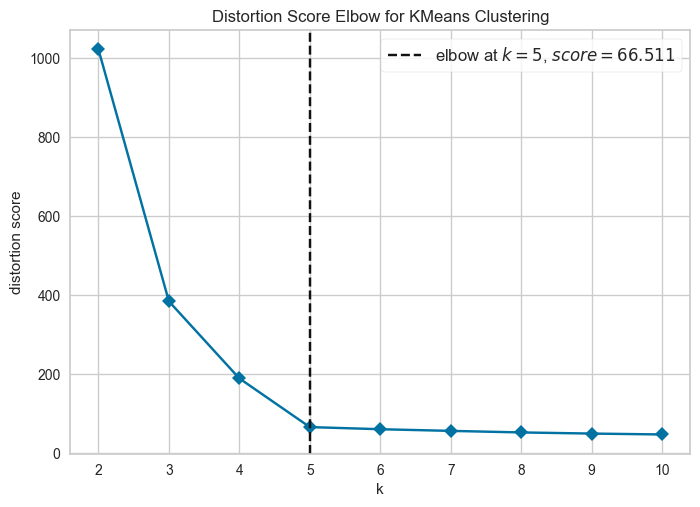

In [8]:
# functional API
plot_model(kmeans, plot = 'elbow')

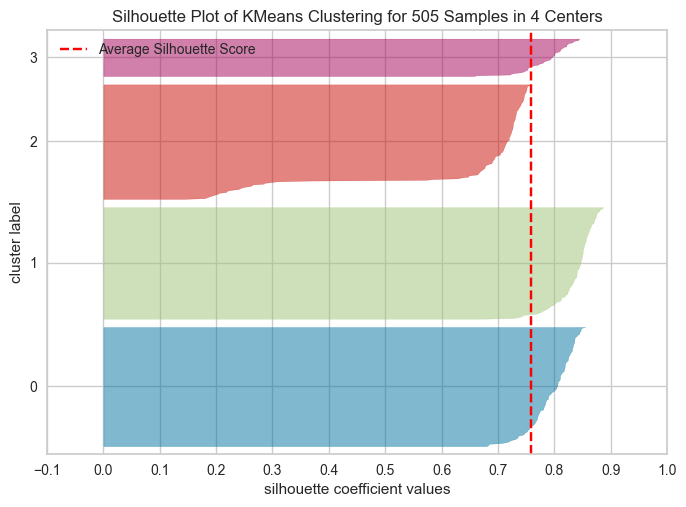

In [9]:
# functional API
plot_model(kmeans, plot = 'silhouette')

## Assign Model

In [10]:
# functional API
result = assign_model(kmeans)
result.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 0
1,59,81799,0.791082,5417.661621,Cluster 0
2,62,74751,0.702657,9258.993164,Cluster 0
3,59,74373,0.765680,7346.334473,Cluster 0
4,87,17760,0.348778,16869.507812,Cluster 1


## Predictions

In [11]:
# functional API
predictions = predict_model(kmeans, data = data)
predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,-0.042287,0.062733,1.103593,-1.072467,Cluster 0
1,-0.000821,0.174811,1.102641,-1.303473,Cluster 0
2,0.123577,-0.021200,0.761727,-0.526556,Cluster 0
3,-0.000821,-0.031712,1.004705,-0.913395,Cluster 0
4,1.160228,-1.606165,-0.602619,1.012686,Cluster 1


## Save the model

In [12]:
# functional API
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', KMeans(n_clusters=4, random_state=3554))]),
 'kmeans_pipeline.pkl')

In [13]:
# functional API
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\lijinlong9\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                             'Savings'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', KMeans(n_clusters=4, random_state=3554))])
